# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [4]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()

In [6]:
#將「輸入層」與「隱藏層1」加入模型

model.add(Dense(units=1000,
input_dim=784,
kernel_initializer='normal',
activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


# Dropout

In [7]:
model.add(Dropout(0.5))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#將「隱藏層2」加入模型
model.add(Dense(units=1000,
kernel_initializer='normal',
activation='relu'))
model.add(Dropout(0.5))

In [9]:
#將「輸出層」加入模型
model.add(Dense(units=10,
kernel_initializer='normal',
activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [12]:
train_history=model.fit(x=x_Train_normalize,
y=y_Train_OneHot,validation_split=0.2,
epochs=10, batch_size=200,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 20s - loss: 0.3659 - acc: 0.8856 - val_loss: 0.1334 - val_acc: 0.9605
Epoch 2/10
 - 20s - loss: 0.1591 - acc: 0.9514 - val_loss: 0.0996 - val_acc: 0.9706
Epoch 3/10
 - 20s - loss: 0.1188 - acc: 0.9633 - val_loss: 0.0878 - val_acc: 0.9735
Epoch 4/10
 - 20s - loss: 0.0980 - acc: 0.9700 - val_loss: 0.0902 - val_acc: 0.9725
Epoch 5/10
 - 20s - loss: 0.0864 - acc: 0.9720 - val_loss: 0.0780 - val_acc: 0.9775
Epoch 6/10
 - 21s - loss: 0.0739 - acc: 0.9772 - val_loss: 0.0765 - val_acc: 0.9768
Epoch 7/10
 - 25s - loss: 0.0640 - acc: 0.9794 - val_loss: 0.0696 - val_acc: 0.9802
Epoch 8/10
 - 23s - loss: 0.0585 - acc: 0.9809 - val_loss: 0.0804 - val_acc: 0.9776
Epoch 9/10
 - 23s - loss: 0.0554 - acc: 0.9822 - val_loss: 0.0714 - val_acc: 0.9801
Epoch 10/10
 - 22s - loss: 0.0526 - acc: 0.9825 - val_loss: 0.0772 - val_acc: 0.9793


# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

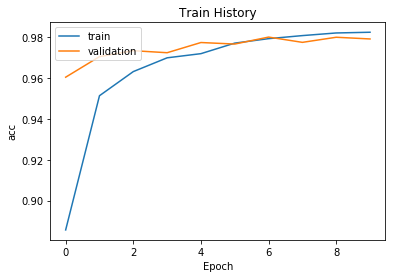

In [14]:
show_train_history(train_history,'acc','val_acc')

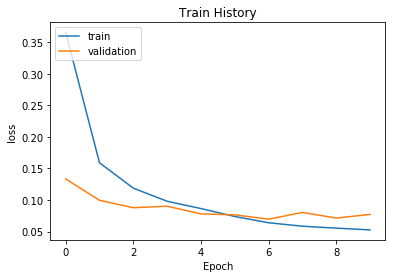

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 240us/step

accuracy= 0.9799


# 進行預測

In [17]:
prediction=model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [18]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
    idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

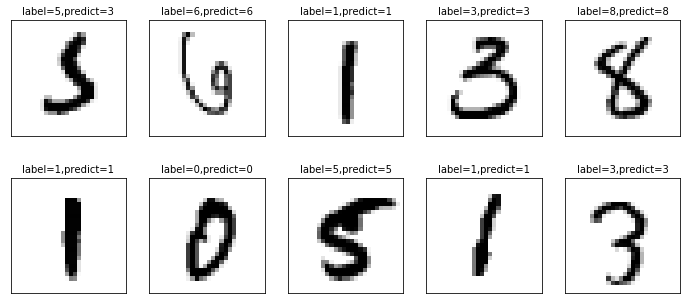

In [19]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

# confusion matrix

In [20]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,0,0,2,1,2,0
1,0,1128,2,0,0,0,1,0,4,0
2,0,1,1024,0,1,0,2,3,1,0
3,0,0,7,989,0,1,0,4,1,8
4,1,2,1,0,961,0,6,2,1,8
5,3,0,0,22,2,850,5,1,5,4
6,4,3,1,1,2,1,945,0,1,0
7,0,6,6,2,0,0,0,1004,3,7
8,3,1,7,6,5,1,2,4,942,3


In [21]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [22]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
674,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2559,5,3
2597,5,3
2810,5,3
3117,5,3


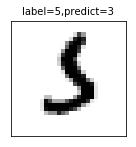

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)